In [26]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import skimage
import os
import imageio
from matplotlib import pyplot as plt
import cv2 #pip install opencv-python

[[[106 107 116]
  [106 107 116]
  [103 103 112]
  ...
  [ 51  39  33]
  [ 48  34  27]
  [ 52  39  29]]

 [[135 139 148]
  [144 147 155]
  [141 144 152]
  ...
  [ 49  35  27]
  [ 49  35  26]
  [ 54  43  31]]

 [[155 160 168]
  [159 164 171]
  [156 162 169]
  ...
  [ 52  36  29]
  [ 52  38  28]
  [ 61  53  41]]

 ...

 [[ 98  80  90]
  [102  83  92]
  [105  86  94]
  ...
  [ 69  45  32]
  [ 69  45  32]
  [ 66  41  26]]

 [[105  96 107]
  [109 100 111]
  [112 102 113]
  ...
  [ 74  51  37]
  [ 73  49  35]
  [ 73  47  33]]

 [[137 139 147]
  [137 138 147]
  [137 138 147]
  ...
  [ 82  59  43]
  [ 78  53  37]
  [ 72  46  31]]]


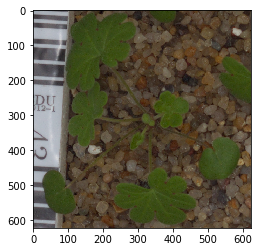

In [27]:
#load all the testing data

plantnames = os.listdir('data/train')
filenames = os.listdir('data/train/'+plantnames[1])
img = imageio.imread('data/train/'+plantnames[1]+'/'+filenames[0])
print(img)
plt.imshow(img, interpolation='nearest')
plt.show()

In [18]:
len(img)

250

In [42]:
def create_mask(img):
    hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(hsvimg, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    plt.imshow(kernel)
    return mask

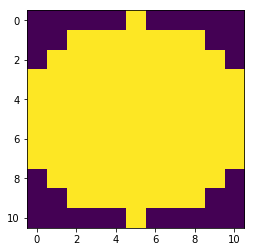

In [43]:
mask = create_mask(img)

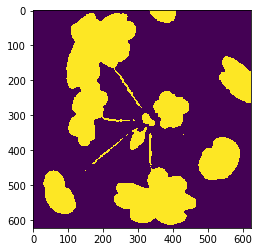

In [44]:
plt.imshow(mask)

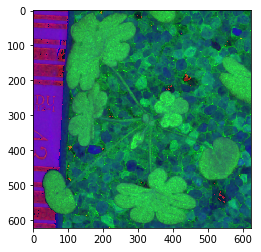

In [32]:
plt.imshow(hsvimg)